<a href="https://colab.research.google.com/github/KingBarbosa99/-NF3-BIG-DATA-MATHEUS-PEREIRA-BARBOSA/blob/main/NF3_BIG_DATA_Matheus_Pereira_Barbosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1) Obtenha o dataset do endereço https://www.w3resource.com/pythonexercises/pandas/filter/world_alcohol.csv e realize as seguintes análises (2,5 pontos):

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

world_alcohol = pd.read_csv ('https://raw.githubusercontent.com/KingBarbosa99/-NF3-BIG-DATA-MATHEUS-PEREIRA-BARBOSA/main/world_alcohol.csv', encoding = 'latin-1',sep = ',')

world_alcohol.head()


In [ ]:
# a) Agrupe os dados por tipo de bebidas "Wine"

world_alcoho = world_alcohol.groupby('Beverage Types')

world_alcoho.get_group('Wine')

In [ ]:
# Agrupe os dados por tipo de bebidas "Other"

world_alcoho.get_group('Other')

In [ ]:
# Agrupe os dados por tipo de bebidas "Spirits"

world_alcoho.get_group('Spirits')

In [ ]:
# Agrupe os dados por tipo de bebidas "Beer"

world_alcoho.get_group('Beer')

In [ ]:
# b) Agrupe os dados por Região e por Ano;

regio_ano  = world_alcohol.groupby(['WHO region','Year']).count()

regio_ano



In [ ]:
# c) Seção de Contagens: Contar a ocorrência de Regiões, de Países e a soma da coluna de valores por Bebida.

world_alcohol [['WHO region','Country']].value_counts()

In [ ]:
# d) Realize análises estatísticas da coluna dos valores: Média, Moda, Mediana, Estatística Descritiva e Gráfico de comparação dos valores agrupados por tipo de bebida

media_valores = world_alcohol['Display Value'].mean()

moda_valores = world_alcohol['Display Value'].mode()[0]

mediana_valores = world_alcohol['Display Value'].median()

estatisticas_descritivas = world_alcohol['Display Value'].describe()


grupo_tipo_bebida = world_alcohol.groupby('Beverage Types')['Display Value'].mean()


print("Média dos Valores:", media_valores)

print("Moda dos Valores:", moda_valores)

print("Mediana dos Valores:", mediana_valores)

print("Estatísticas Descritivas dos Valores:")

print(estatisticas_descritivas)


fig, ax = plt.subplots()

grupo_tipo_bebida.plot(kind='bar', ax=ax)

ax.set_xlabel('Tipo de Bebida')

ax.set_ylabel('Média dos Valores')

ax.set_title('Comparação dos Valores Agrupados por Tipo de Bebida')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
# e) Mostre resultados de acordo com alguns critérios:

# Mostrar a coluna de bebidas do ano de 1985.

dados_1985 = world_alcohol[world_alcohol['Year'] == 1985]['Beverage Types']


print(dados_1985)

In [ ]:
# Mostrar a coluna de Região com valores acima de 4.

world_alcohol[world_alcohol['Display Value'] > 4]['WHO region']

world_alcohol

2) Seja o dataset chamado cursos-prouni.csv que se encontra no endereço Cursos e notas de corte do
PROUNI 2018 - Datasets - Brasil.IO. Baixe o arquivo, armazene no seu github** e obtenha os dados
a partir desse endereço do github e realize as seguintes análises (2,5 pontos):

In [70]:
import pandas as pd

import matplotlib.pyplot as plot

cursos_prouni = pd.read_csv('https://raw.githubusercontent.com/KingBarbosa99/-NF3-BIG-DATA-MATHEUS-PEREIRA-BARBOSA/main/cursos-prouni.csv',encoding = 'latin-1',sep = ',')

cursos_prouni

cursos_prouni = cursos_prouni.replace('TecnolÃ³gico','Tecnológico',regex = True)

cursos_prouni = cursos_prouni.replace('MatemÃ¡tica','Matemática',regex = True)





In [71]:
# a) Efetuar a limpeza das colunas de notas: onde tiver NaN (Not a Number), substituir por 0,0.

cursos_prouni['nota_integral_ampla'].fillna(0.0,inplace = True)

cursos_prouni['nota_integral_cotas'].fillna(0.0,inplace = True)

cursos_prouni['nota_parcial_ampla'].fillna(0.0,inplace = True)

cursos_prouni['nota_parcial_cotas'].fillna(0.0,inplace = True)

In [ ]:
# b) Agrupe os dados pelo grau (Bacharelado, Licenciatura, etc)

grau = cursos_prouni.groupby('grau')

grau.get_group('Bacharelado')



In [ ]:
grau.get_group('Licenciatura')

In [ ]:
grau.get_group('Tecnológico')

In [75]:
# c) Agrupe os dados pelos cursos de Matemática, Medicina e Pedagogia.

cursos_prounil = cursos_prouni.groupby('curso_busca')


In [ ]:
cursos_prounil.get_group('Matemática')

In [ ]:
cursos_prounil.get_group('Medicina')

In [ ]:
cursos_prounil.get_group('Pedagogia')

In [ ]:
# d) Agrupe os dados por Estado e obtenha a média de notas de corte por Estado.

cursos_prouni.groupby('uf_busca')['nota_integral_ampla'].mean()

In [ ]:
# e) Agrupe os dados pelos cursos Tecnológicos.

grau.get_group('Tecnológico')

In [80]:
# f) Elimine a coluna “cidade_filtro” do dataframe.

cursos_prouni.drop('cidade_filtro', axis=1, inplace=True)

In [81]:
# g) Apresente a média das mensalidades dos cursos de Medicina.

media_mensalidade_medicina = cursos_prounil.get_group('Medicina')['mensalidade'].mean()

media_mensalidade_medicina


7168.341532258064

In [82]:
# h) Média das notas de corte dos cursos de tempo integral.

turno_integral = cursos_prouni.groupby('turno')

media_curso_integral = turno_integral.get_group('Integral')['nota_integral_ampla'].mean()

media_curso_integral


605.07878125

In [83]:
# i) Estatística Descritiva das Notas Integral Ampla dos cursos de Bacharelado


nota_integral_bacharelado = grau.get_group('Bacharelado')['nota_integral_ampla'].describe()

nota_integral_bacharelado

count    19165.000000
mean       500.687570
std        230.945314
min          0.000000
25%        543.480000
50%        594.280000
75%        627.500000
max        781.200000
Name: nota_integral_ampla, dtype: float64

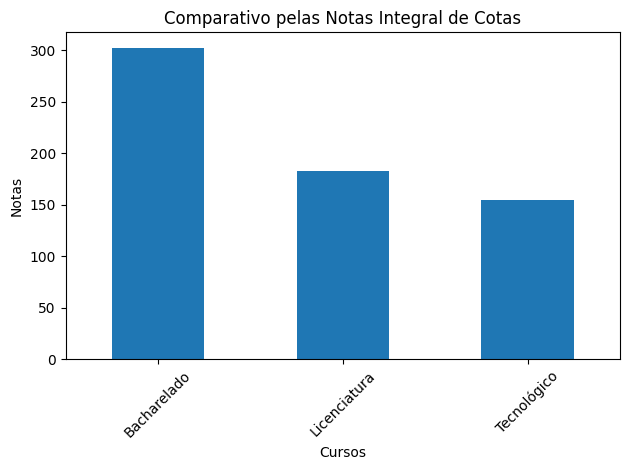

In [84]:
# j) Gráfico comparativo entre o grau dos cursos (Bacharelado, Licenciatura, Tecnologia, etc) pelas Notas Integral de Cotas.


curso_integral_cotas = cursos_prouni.groupby('grau')['nota_integral_cotas'].mean()

fig, ax = plt.subplots()

curso_integral_cotas.plot(kind='bar', ax=ax)

ax.set_xlabel('Cursos')

ax.set_ylabel('Notas')

ax.set_title('Comparativo pelas Notas Integral de Cotas')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()
